# GAN variant

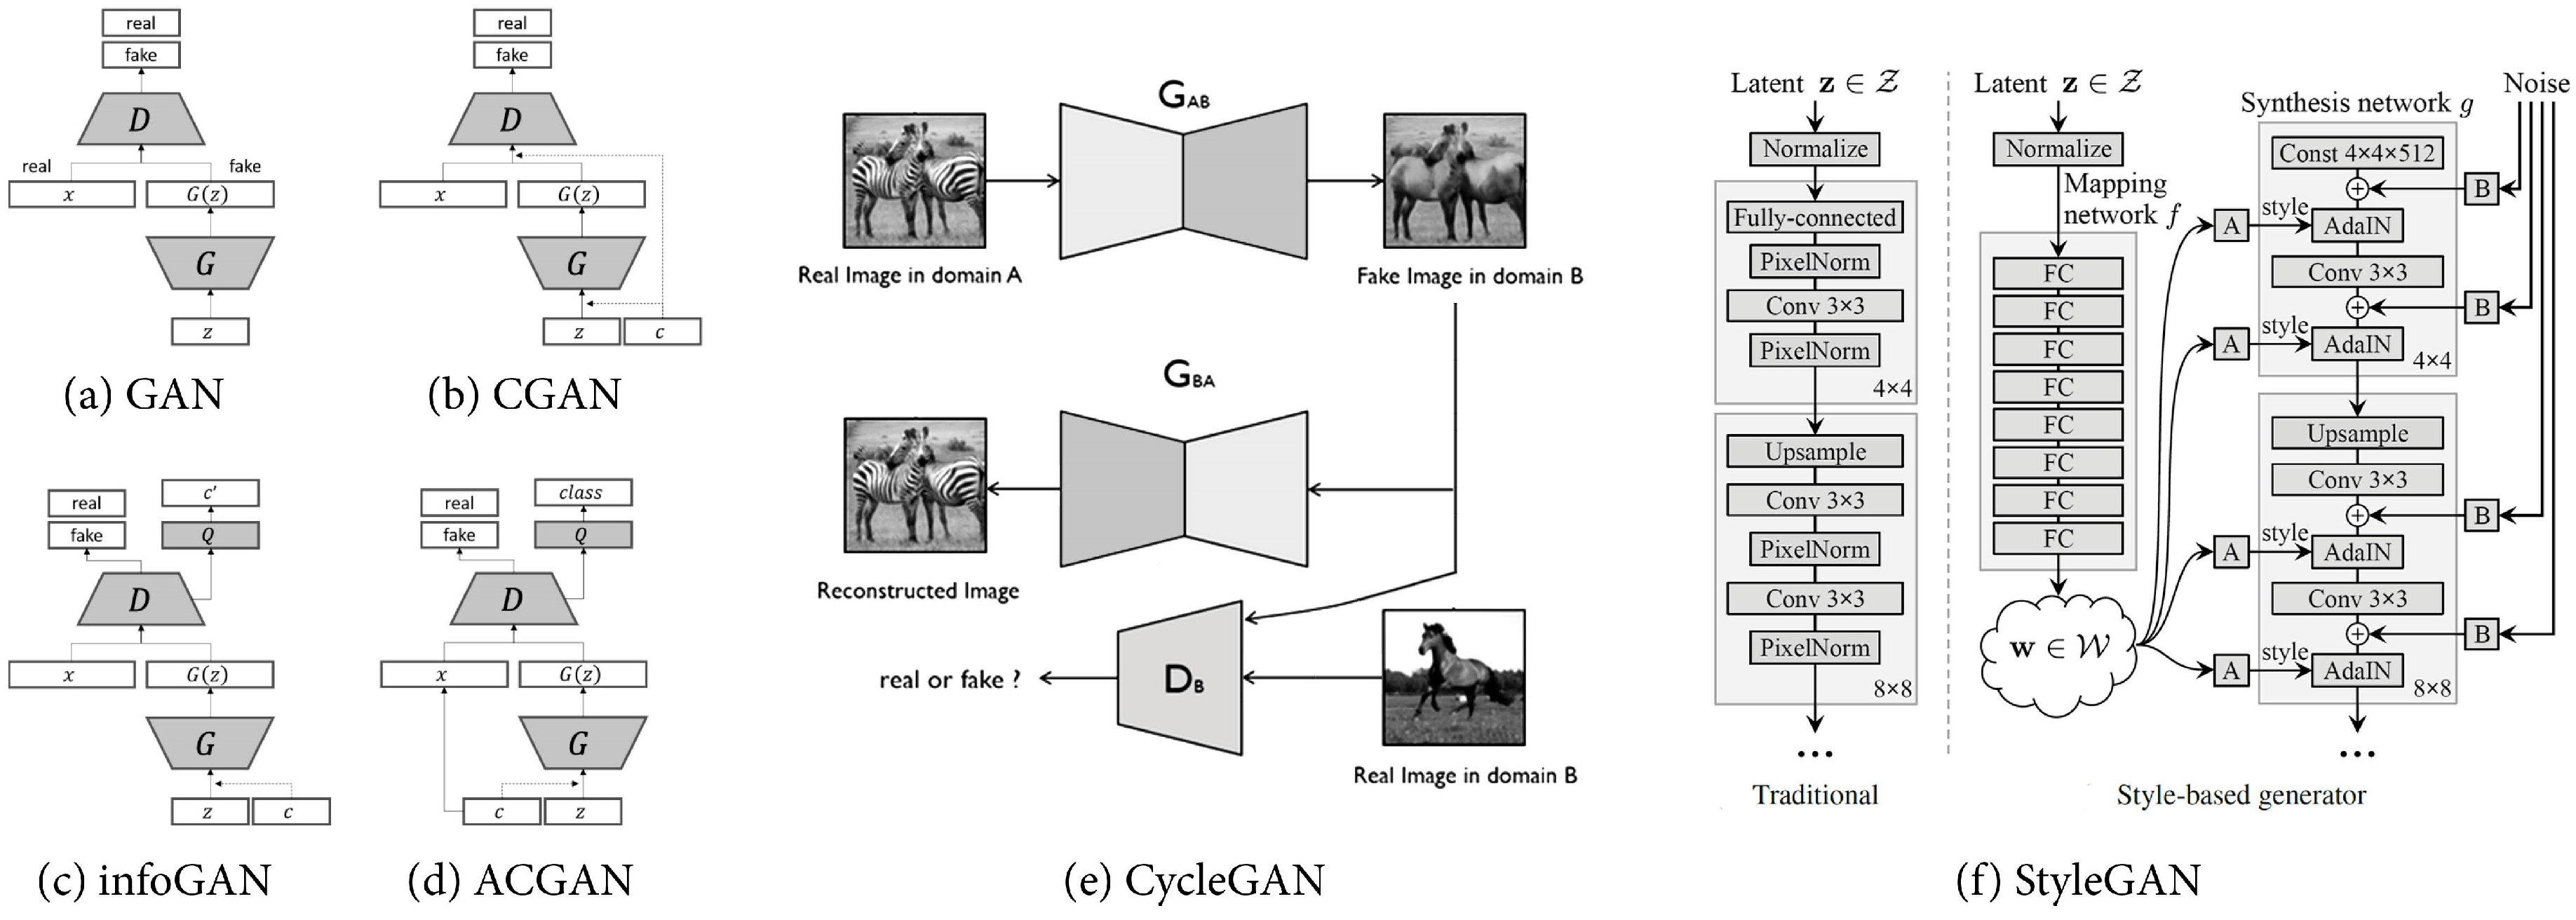

# Disentangled Representation

## StyleGAN

[StyleGAN](https://arxiv.org/pdf/1812.04948.pdf) is designed to generate high-quality images with control over both **style and content** by disentangling the style and content representations in the latent space.

### architecture

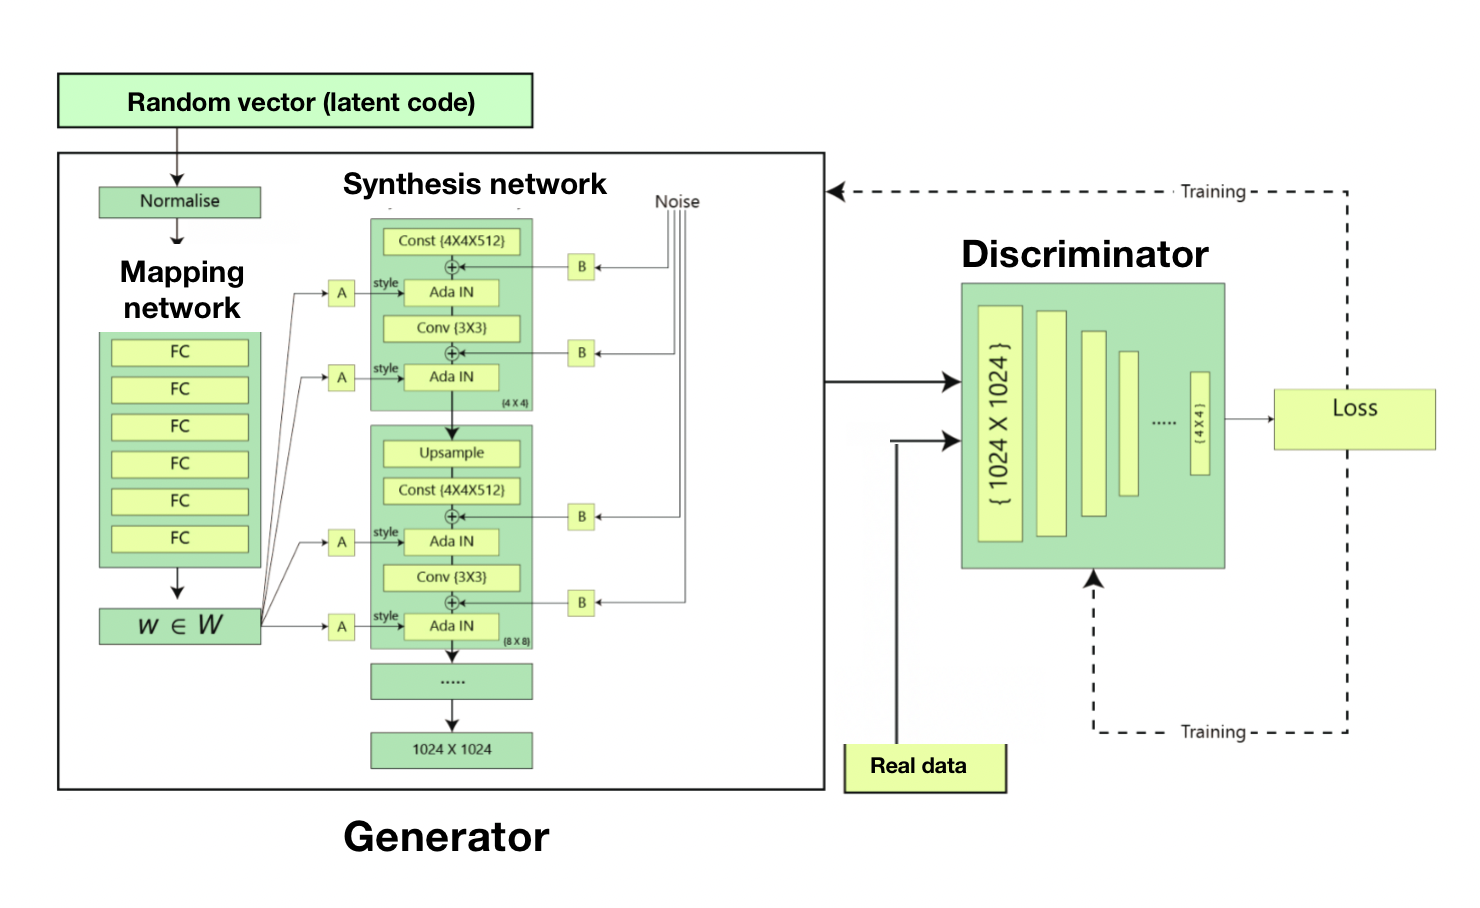

generator contains 2 networks: Mapping network and Synthesis network

discriminator is traditional GAN discriminator.


- Mapping Network:

    FCN that takes the input latent code (usually a random noise vector) and maps it to an intermediate latent space $W$.

    The purpose is to disentangle the input latent code and create a more structured and meaningful representation that can be used to control the style of the generated images.

    The output of the mapping network is then used to modulate the style of the generated images at different levels of detail in the synthesis network.

- Synthesis Network:

    generate  images from the intermediate latent representation produced by the mapping network.

    architecture is similar to a traditional GAN generator, consisting of a series of convolutional layers followed by upsampling operations.

    **Adaptive Instance Normalization (AdaIN) layers**: modulate **style** of generated images at different resolutions.

    By controlling the style at different layers of the synthesis network, StyleGAN can generate images with fine-grained control over the style and content.

### objective

objective function: traditional GAN loss + style and content losses:

$$
\min_G \max_D \mathbb{E}_{x \sim p_r(x)}[\log D(x)] + \mathbb{E}_{z \sim p(z)}[\log(1 - D(G(z)))] + \lambda_{style} \mathcal{L}_{style} + \lambda_{content} \mathcal{L}_{content}
$$

generator loss: GAN loss + style and content loss

discriminator loss: GAN loss

Here,
- $x$ represents real data
- $z$ represents the noise vector
- $G(z)$ is the generator's output given the noise vector
- $D(x)$ is the discriminator's output given real data
- $\mathcal{L}_{style}$ is style loss, encourages generator to produce images with the desired style
- $\mathcal{L}_{content}$ is content loss, enforces preservation of content in generated images.
- $\lambda_{style}$ and $\lambda_{content}$ are hyperparameters controlling the trade-off between the GAN loss and the style/content losses.

### training algorithm

1. Initialize generator (G) (mapping network F and synthesis network S) and discriminator (D) with random weights.

2. For each epoch:

   For each batch of real data and noise samples:

   Train the discriminator:

      1. Sample a batch of real data, $x_{real} \sim p_r(x)$.

      2. Sample a batch of noise, $z \sim p(z)$.

      3. Generate a batch of fake data by passing $z$ through mapping network $F$ to obtain the intermediate latent representation $w = F(z)$, then passing $w$ through synthesis network $S$ to generate the image: $x_{fake} = S(w)$.

      4. Calculate the discriminator's output for the real and fake data, $D(x_{real})$ and $D(x_{fake})$, respectively.

      5. Compute **GAN loss** for discriminator 
      
      6. update discriminator's weights.
      
   Train the generator:

      1. Sample a new batch of noise, $z \sim p(z)$.

      2. Generate a batch of fake data by passing $z$ through mapping network $F$ to obtain the intermediate latent representation $w = F(z)$, then passing $w$ through synthesis network $S$ to generate the image: $x_{fake} = S(w)$.

      3. Calculate the discriminator's output for the real and fake data, $D(x_{real})$ and $D(x_{fake})$, respectively.

      4. Compute GAN loss, $\mathcal{L}_{style}$ and content loss $\mathcal{L}_{content}$ for generator.

      5. update weights of generator (mapping and synthesis networks) using the combined loss 

## infoGAN

[InfoGAN](https://arxiv.org/pdf/1606.03657.pdf) encourages the generator to learn interpretable representations that **can be controlled by varying the latent codes** in an unsupervised manner


architecture:

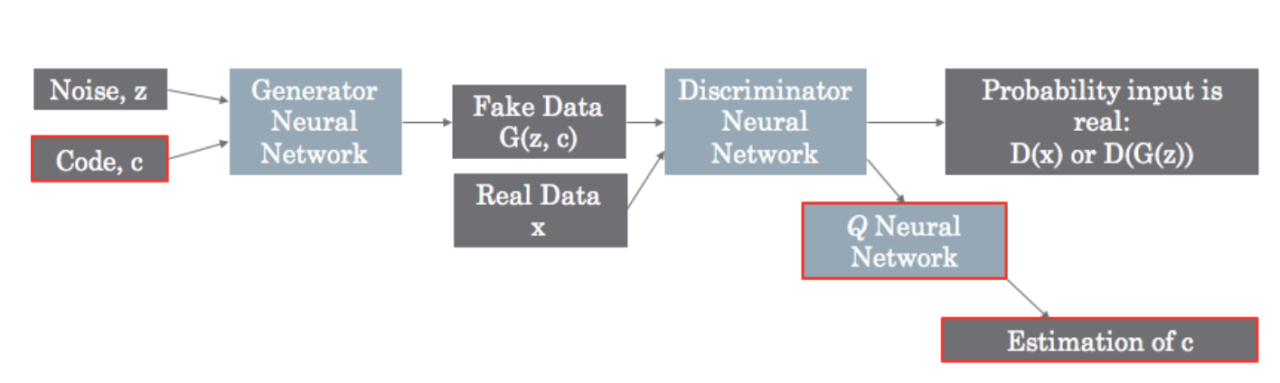

objective: traditional GAN objective and a MI regularization term

regularization term: maximize mutual information between a subset of noise vector, called latent codes $c$, and generated samples.

$$
\min_G \max_D \mathbb{E}_{x \sim p_r(x)}\log D(x) + \mathbb{E}_{z \sim p(z), c \sim p(c)}\log(1 - D(G(z, c))) - \lambda I(G(z, c); c)
$$

Here, $z$ represents the noise vector, $c$ represents the latent codes, 

$G(z, c)$ is the generator's output when provided with both noise and latent codes as input. 

$I(G(z, c); c)$ denotes the mutual information between the generated samples and the latent codes, 

$\lambda$ is a hyperparameter that controls the trade-off between GAN objective and MI maximization.

- training procedure follows the typical GAN training process

## conditional GAN

- Conditional GAN (cGAN) allows for generation of samples conditioned on additional information, such as class labels or attributes. 

- cGAN is supervised learning

### objective function

objective function: incorporate conditioning information into both generator and discriminator.

$$
\min_G \max_D \mathbb{E}_{x \sim p_r(x), y}[\log D(x, y)] + \mathbb{E}_{z \sim p(z), y}[\log(1 - D(G(z, y), y))]
$$

Here, $x$ is real data, **$y$ is conditioning information**, $z$ is noise

$G(z, y)$ is generator's output when provided with both noise and conditioning information as input. 

discriminator $D(x, y)$ now takes both the data and the conditioning information as input, and its output represents the probability that the input data is real, given the conditioning information.

discriminator will penalize generator if generated data don't match the conditioning information of real data.

### architecture

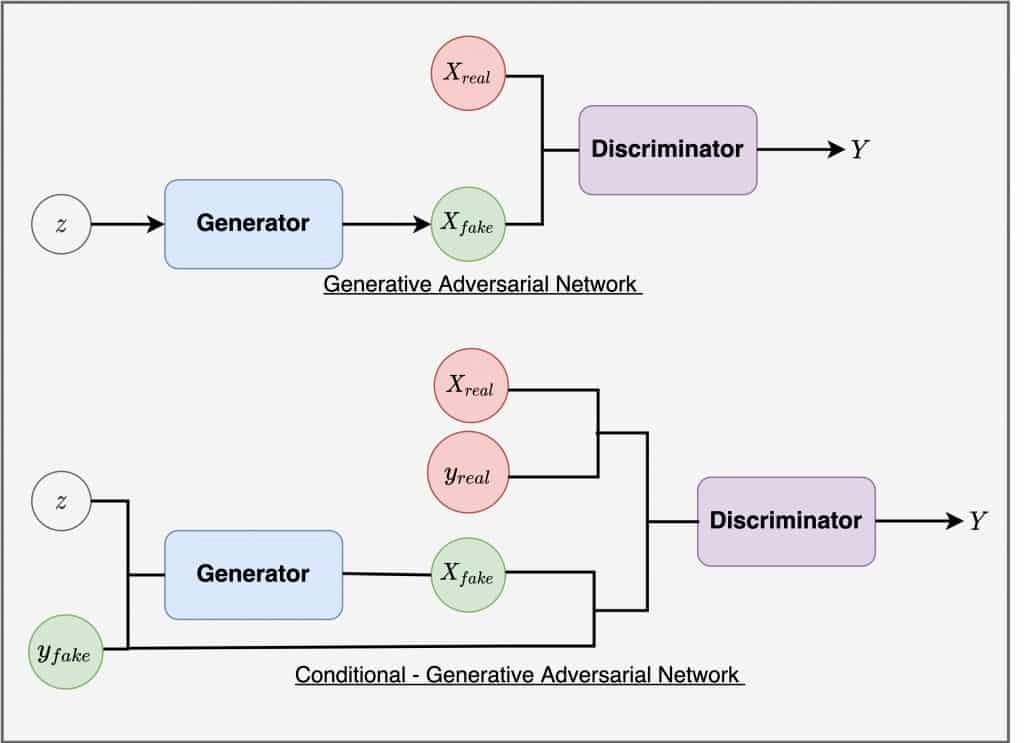

### training algorithm

1. Initialize the generator ($G$) and the discriminator ($D$) networks with random weights.

2. For each epoch:

   For each batch of real data, noise samples, and conditions:

   Train the discriminator:

      1. Sample a batch of real data, $x \sim p_r(x)$, and their conditions, $y$.

      2. Sample a batch of noise, $z \sim p(z)$.

      3. Generate a batch of fake data using the generator, $G(z, y)$.

      4. Calculate the discriminator's output for the real and fake data, $D(x, y)$ and $D(G(z, y), y)$, respectively.

      5. Compute the discriminator's loss: $\mathcal{L}_D = \mathbb{E}[\log D(x, y)] + \mathbb{E}[\log(1 - D(G(z, y), y))]$.

      6. Update the discriminator's weights by performing a gradient ascent step to maximize $\mathcal{L}_D$.
   
   Train the generator:

      1. Sample a new batch of noise, $z \sim p(z)$, and conditions, $y$.

      2. Generate a batch of fake data using the generator, $G(z, y)$.

      3. Calculate the discriminator's output for the fake data, $D(G(z, y), y)$.

      4. Compute the generator's loss: $\mathcal{L}_G = \mathbb{E}[\log(1 - D(G(z, y), y))]$.

      5. Update the generator's weights by performing a gradient descent step to minimize $\mathcal{L}_G$.

## Adversarial Autoencoder

### architecture: Autoencoder + GAN 

Adversarial Autoencoder (AAE) combines the autoencoder with GAN to learn a probabilistic and generative model. 

The objective of AAE is to enforce the latent code distribution to match a given **prior distribution** while also learning to reconstruct the input data.

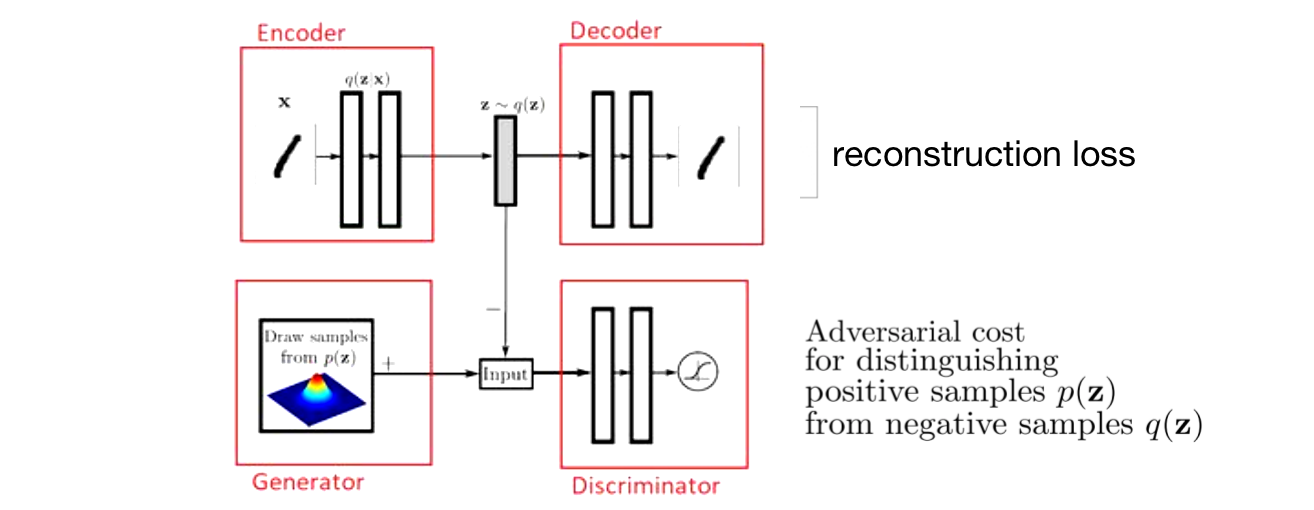

### objective

objective: reconstruction loss + adversarial loss.

The objective of the Adversarial Autoencoder (AAE) consists of two parts: a reconstruction loss and an adversarial loss.

1. Reconstruction Loss ($\mathcal{L}_{rec}$): The autoencoder is trained to minimize the reconstruction error between the input data ($x$) and its reconstruction ($x'$). This can be measured using mean squared error (MSE) or other suitable loss functions. For example, in the case of MSE:

$$
\mathcal{L}_{rec}(E, G) = \mathbb{E}_{x \sim p_r(x)}\|x - G(E(x))\|^2
$$

2. Adversarial Loss ($\mathcal{L}_{adv}$): The encoder is treated as the generator, and an additional discriminator network is introduced. The adversarial loss aims to make the latent code distribution ($q(z|x)$) match the given prior distribution ($p(z)$) using the GAN framework:

$$
\min_E \max_D \mathbb{E}_{z \sim p(z)}[\log D(z)] + \mathbb{E}_{x \sim p_r(x)}[\log(1 - D(E(x)))]
$$

The overall objective of the AAE is a combination of the reconstruction loss and the adversarial loss:

$$
\min_{E, G} \max_D \mathcal{L}_{rec}(E, G) + \lambda \mathcal{L}_{adv}(E, D)
$$

Here, $\lambda$ is a hyperparameter that controls trade-off between reconstruction loss and adversarial loss.

### training algorithm


1. Initialize the encoder ($E$), decoder ($G$), and the discriminator ($D$) networks with random weights.

2. For each epoch:

   For each batch of real data and noise samples:

   Train the autoencoder:
      1. Sample a batch of real data, $x \sim p_r(x)$.
      2. Encode the data into latent codes using the encoder, $z = E(x)$.
      3. Reconstruct the data using the decoder, $x' = G(z)$.
      4. Compute the reconstruction loss and update the encoder and decoder weights.

   Train the discriminator:
      1. generate positive sample: Sample a batch of noise from the prior distribution, $z' \sim p(z')$. typically chosen to be a simple distribution, like a Gaussian or a Uniform distribution.
      2. generate negative sample: Encode a batch of real data into latent codes using the encoder, $z = E(x)$.
      3. Calculate the discriminator's output for the real and fake latent codes, $D(z')$ and $D(z)$, respectively.
      4. Compute the discriminator's loss and update its weights.

   Train the encoder (generator):
      1. generate negative sample: Encode a batch of real data into latent codes using the encoder, $z = E(x)$.
      2. Calculate the discriminator's output for the encoded latent codes, $D(z)$.
      3. Compute the generator's (encoder's) loss and update its weights.



### inference

- encoder and discriminator aren't used, only need generator and decoder.

- trained generator: Sample a latent code $z$ from the prior distribution $p(z)$. 

- trained decoder: take sampled latent code $z$ and output a sample $x' = G(z)$ from the learned data distribution.

# Domain transfer

| GAN | Objective | Objective Function      | Training Algorithm |
|----------------|------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------:|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| DiscoGAN       | Transfer style between two domains while preserving content   | $\mathcal{L}_{GAN}(G, D_Y, X, Y) + \mathcal{L}_{GAN}(F, D_X, Y, X) + \lambda \mathcal{L}_{cyc}(G, F)$                                                                                   | 1. Train generators with reconstruction loss and adversarial loss.<br>2. Train discriminators with adversarial loss.       |
| CycleGAN       | Unpaired image-to-image translation between two domains      | $\mathcal{L}_{GAN}(G, D_Y, X, Y) + \mathcal{L}_{GAN}(F, D_X, Y, X) + \lambda_{cyc} \mathcal{L}_{cyc}(G, F)+ \lambda_{identity} \mathcal{L}_{identity}(G, F)$                          | 1. Train generators with adversarial loss and cycle-consistency loss.<br>2. Train discriminators with adversarial loss.<br>            |
| TraVeLGAN      | Generate images with control over attributes by traversing the latent space | $\mathcal{L}_{GAN} + \lambda \mathcal{L}_{traversal}$ | 1. Train generator and discriminator using GAN loss.<br>2. Train generator using traversal loss (encourage smooth transitions)|


## DiscoGAN

[DiscoGAN](https://arxiv.org/abs/1703.05192) aims to learn a mapping between two distinct image domains (A and B) by unsupervised learning without using any paired training examples. 

The goal is to transfer the style or attributes from one domain to the other while preserving the content and structure of the input images.

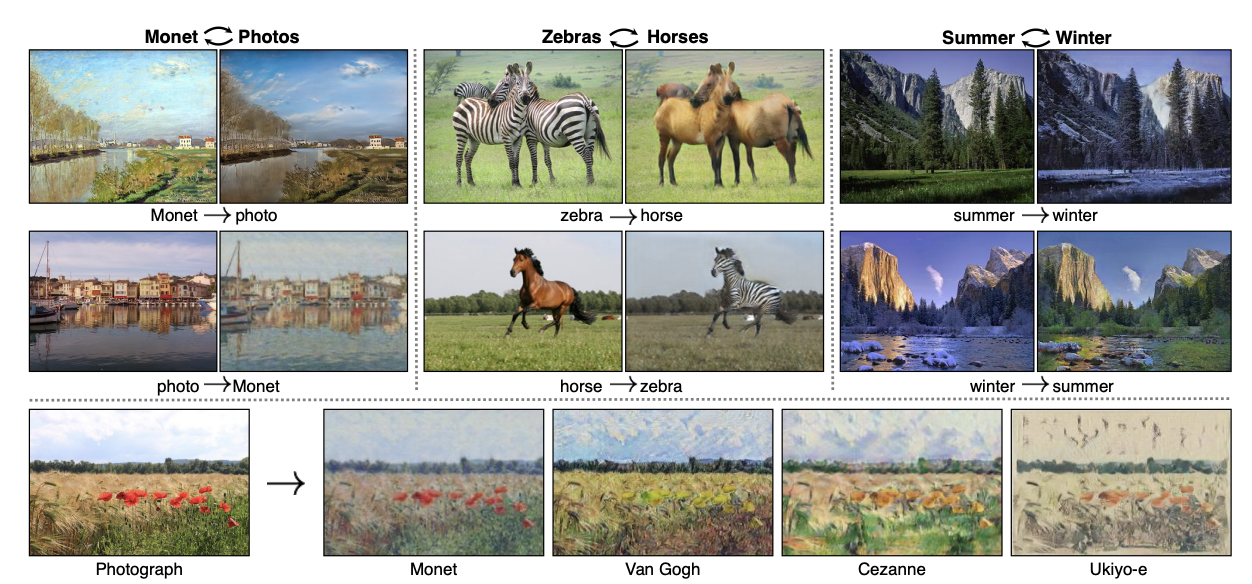

### objective

The objective function of DiscoGAN combines adversarial loss and cycle-consistency loss:

$$
\mathcal{L} = \mathcal{L}_{adv}(G_{AB}, D_A, A, B) + \mathcal{L}_{adv}(G_{BA}, D_B, B, A) + \lambda \mathcal{L}_{cycle}(G_{AB}, G_{BA})
$$

Here,
- $\mathcal{L}_{adv}$ represents the adversarial loss for each generator-discriminator pair.
- $\mathcal{L}_{cycle}$ is the cycle-consistency loss that enforces consistency of structure and content between the original and reconstructed images.
- $\lambda$ is a hyperparameter controlling the trade-off between adversarial loss and cycle-consistency loss.


### architecture

DiscoGAN consists of two generators and two discriminators for two domains, A and B:

- Generator $G_A$: Translates images from domain A to domain B.

- Generator $G_B$: Translates images from domain B to domain A.

- Discriminator $D_A$: Discriminates between real images from domain A and generated images from domain B.

- Discriminator $D_B$: Discriminates between real images from domain B and generated images from domain A.

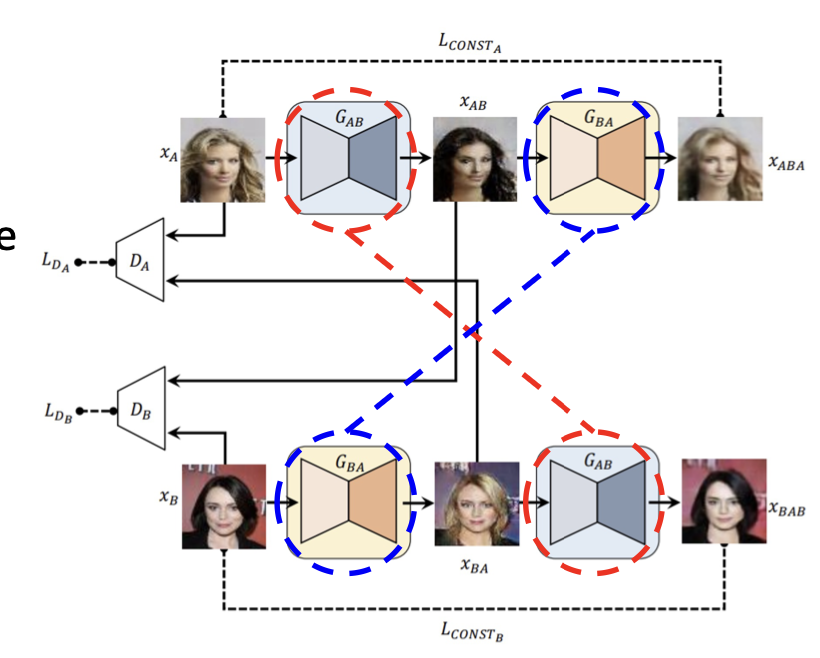

### training algorithm

1. Initialize generators $G_A$ and $G_B$, and discriminators $D_A$ and $D_B$.

2. For each epoch:

   a. Shuffle the datasets of domain A and domain B.

   b. For each mini-batch of images $x_A$ from domain A and $x_B$ from domain B:

      1. Generate fake images: $x_{AB} = G_{AB}(x_A)$ and $x_{BA} = G_{BA}(x_B)$.

      2. Compute adversarial losses for generators and discriminators: $\mathcal{L}_{adv}$.

      3. Compute cycle-consistency losses: $\mathcal{L}_{cycle}$.

      4. Optionally compute identity losses: $\mathcal{L}_{id}$.

      5. Update generators $G_{AB}$ and $G_{BA}$ using the combined loss: $\mathcal{L}_{adv} + \lambda_{cycle} \mathcal{L}_{cycle} + \lambda_{id} \mathcal{L}_{id}$.
      
      6. Update discriminators $D_A$ and $D_B$ using their respective adversarial losses: $\mathcal{L}_{adv}$.

   c. Optionally evaluate and save the model at regular intervals.

4. Save the final trained models.

## CycleGAN

[CycleGAN](https://arxiv.org/abs/1703.10593) modified DiscoGAN by adding **identity loss** that regularize the
generator to be near an identity mapping when real samples
of the target domain are provided as input. i.e. $G_{AB}(x_B)=x_B$

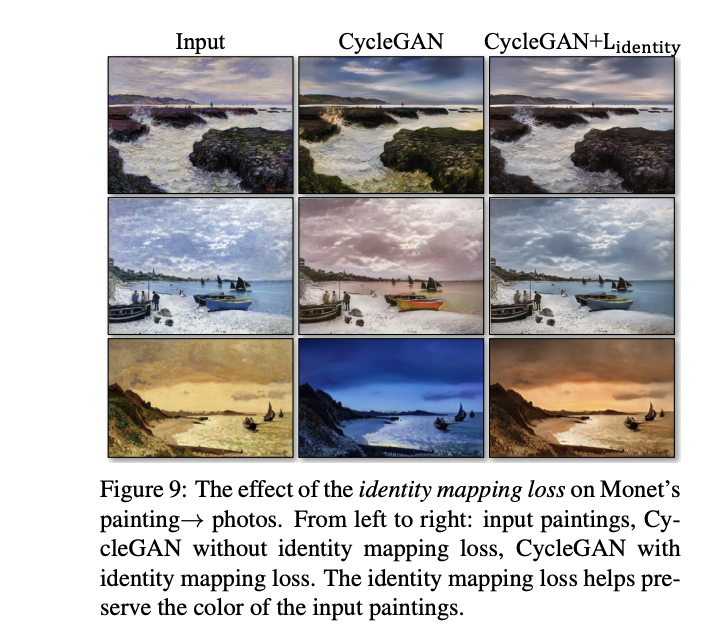

The objective function of CycleGAN combines adversarial loss and cycle-consistency loss and **identity loss**:

$$
\mathcal{L} = \mathcal{L}_{adv}(G_{AB}, D_A, A, B) + \mathcal{L}_{adv}(G_{BA}, D_B, B, A) + \lambda_{cycle} \mathcal{L}_{cycle}(G_{AB}, G_{BA})+ \lambda_{id} \mathcal{L}_{id}(G_{AB}, G_{BA}, A, B)
$$

Here,
- $\mathcal{L}_{adv}$ represents the adversarial loss for each generator-discriminator pair.

- $\mathcal{L}_{cycle}$ is cycle-consistency loss that enforces consistency of structure and content between original reconstructed images.

- $\mathcal{L}_{id}$ is **identity loss** that regularize the
generator to be near an identity mapping when real samples
of the target domain are provided as input. i.e. $G_{AB}(x_B)=x_B$

- $\lambda_{cycle}$ and $\lambda_{id}$ are hyperparameters controlling the trade-off between different loss components.